In [96]:
import pandas as pd

In [97]:
dados = pd.read_csv('aluguel_residencial.csv', sep = ';')

In [98]:
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
5,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,29.33,Casa
6,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0,15.38,Casa
7,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apartamento
8,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.67,Apartamento
9,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,50.00,Apartamento


##### https://pandas.pydata.org/pandas-docs/stable/api.html#api-dataframe-stats

In [99]:
dados['Valor'].mean()

5046.172821405663

In [100]:
bairros = ['Barra da Tijuca', 'Copacabana', 'Ipanema', 'Leblon', 'Botafogo', 'Flamengo', 'Tijuca']
selecao = dados['Bairro'].isin(bairros)
dados = dados[selecao]

In [101]:
dados['Bairro'].drop_duplicates()

0          Copacabana
5     Barra da Tijuca
15             Tijuca
19            Ipanema
23           Botafogo
27             Leblon
79           Flamengo
Name: Bairro, dtype: object

In [102]:
grupo_bairro = dados.groupby('Bairro')

In [103]:
type(grupo_bairro)

pandas.core.groupby.generic.DataFrameGroupBy

In [104]:
grupo_bairro.groups

{'Barra da Tijuca': [5, 14, 16, 21, 30, 32, 35, 42, 43, 56, 61, 62, 65, 69, 75, 80, 94, 108, 111, 113, 118, 131, 133, 137, 151, 154, 156, 166, 167, 174, 187, 190, 208, 215, 222, 225, 234, 237, 240, 245, 260, 266, 275, 277, 292, 293, 294, 296, 303, 309, 312, 326, 336, 337, 346, 361, 367, 369, 375, 381, 388, 390, 401, 413, 433, 434, 436, 437, 440, 450, 452, 463, 464, 466, 474, 477, 485, 495, 501, 504, 512, 538, 539, 540, 541, 544, 548, 553, 555, 556, 557, 585, 588, 589, 591, 595, 597, 602, 612, 623, ...], 'Botafogo': [23, 48, 88, 89, 112, 120, 128, 135, 197, 201, 226, 335, 363, 416, 417, 499, 525, 527, 546, 594, 650, 686, 720, 757, 766, 823, 828, 862, 916, 925, 929, 1007, 1044, 1081, 1092, 1111, 1117, 1128, 1141, 1166, 1202, 1206, 1224, 1251, 1283, 1296, 1305, 1318, 1349, 1384, 1415, 1420, 1457, 1519, 1531, 1581, 1632, 1658, 1673, 1702, 1744, 1745, 1791, 1817, 1826, 1829, 1856, 1925, 1934, 1959, 1961, 1976, 1986, 1994, 2034, 2071, 2074, 2086, 2088, 2089, 2093, 2102, 2153, 2154, 2170, 218

In [105]:
for bairro, data in grupo_bairro:
    print('{} -> {}'.format(bairro, data.Valor.mean().round(2)))

Barra da Tijuca -> 7069.55
Botafogo -> 8791.83
Copacabana -> 4126.68
Flamengo -> 4113.53
Ipanema -> 9352.0
Leblon -> 8746.34
Tijuca -> 2043.52


In [106]:
grupo_bairro[['Valor', 'Condominio']].mean().round(2)

,Valor,Condominio
Bairro,,
Barra da Tijuca,7069.55,3590.34
Botafogo,8791.83,976.32
Copacabana,4126.68,1148.57
Flamengo,4113.53,1102.15
Ipanema,9352.00,2244.44
Leblon,8746.34,2107.18
Tijuca,2043.52,711.69


### Estatísticas Descritivas

In [107]:
grupo_bairro['Valor'].describe().round(2)
teste = grupo_bairro['Valor'].describe().round(2).rename(columns={'count':'Contagem', 
                                                                  'mean':'Média', 'std':'Soma Total','min':'Mínimo', 'max': 'Máximo'})
teste



,Contagem,Média,Soma Total,Mínimo,25%,50%,75%,Máximo
Bairro,,,,,,,,
Barra da Tijuca,3863.0,7069.55,11874.15,800.0,2500.0,4500.0,8500.0,600000.0
Botafogo,873.0,8791.83,152202.41,700.0,2200.0,3000.0,4350.0,4500000.0
Copacabana,2644.0,4126.68,3611.41,100.0,2000.0,3000.0,4800.0,35000.0
Flamengo,714.0,4113.53,3839.13,800.0,1900.0,2900.0,4975.0,35000.0
Ipanema,1764.0,9352.00,8219.72,1200.0,4500.0,7000.0,11000.0,90000.0
Leblon,1258.0,8746.34,7004.04,100.0,4500.0,7000.0,10500.0,100000.0
Tijuca,1100.0,2043.52,1664.34,750.0,1500.0,1800.0,2300.0,45000.0


In [108]:
grupo_bairro['Valor'].aggregate(['min','max', 'sum']).rename(columns = {'min': 'Mínimo', 'max':'Máximo', 'sum':'Soma'})

,Mínimo,Máximo,Soma
Bairro,,,
Barra da Tijuca,800.0,600000.0,27309683.0
Botafogo,700.0,4500000.0,7675266.0
Copacabana,100.0,35000.0,10910934.0
Flamengo,800.0,35000.0,2937058.0
Ipanema,1200.0,90000.0,16496930.0
Leblon,100.0,100000.0,11002902.0
Tijuca,750.0,45000.0,2247872.0


##### https://matplotlib.org

In [109]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (20, 10))

Text(0.5, 1.0, 'Valor Médio do Aluguel por Bairro')

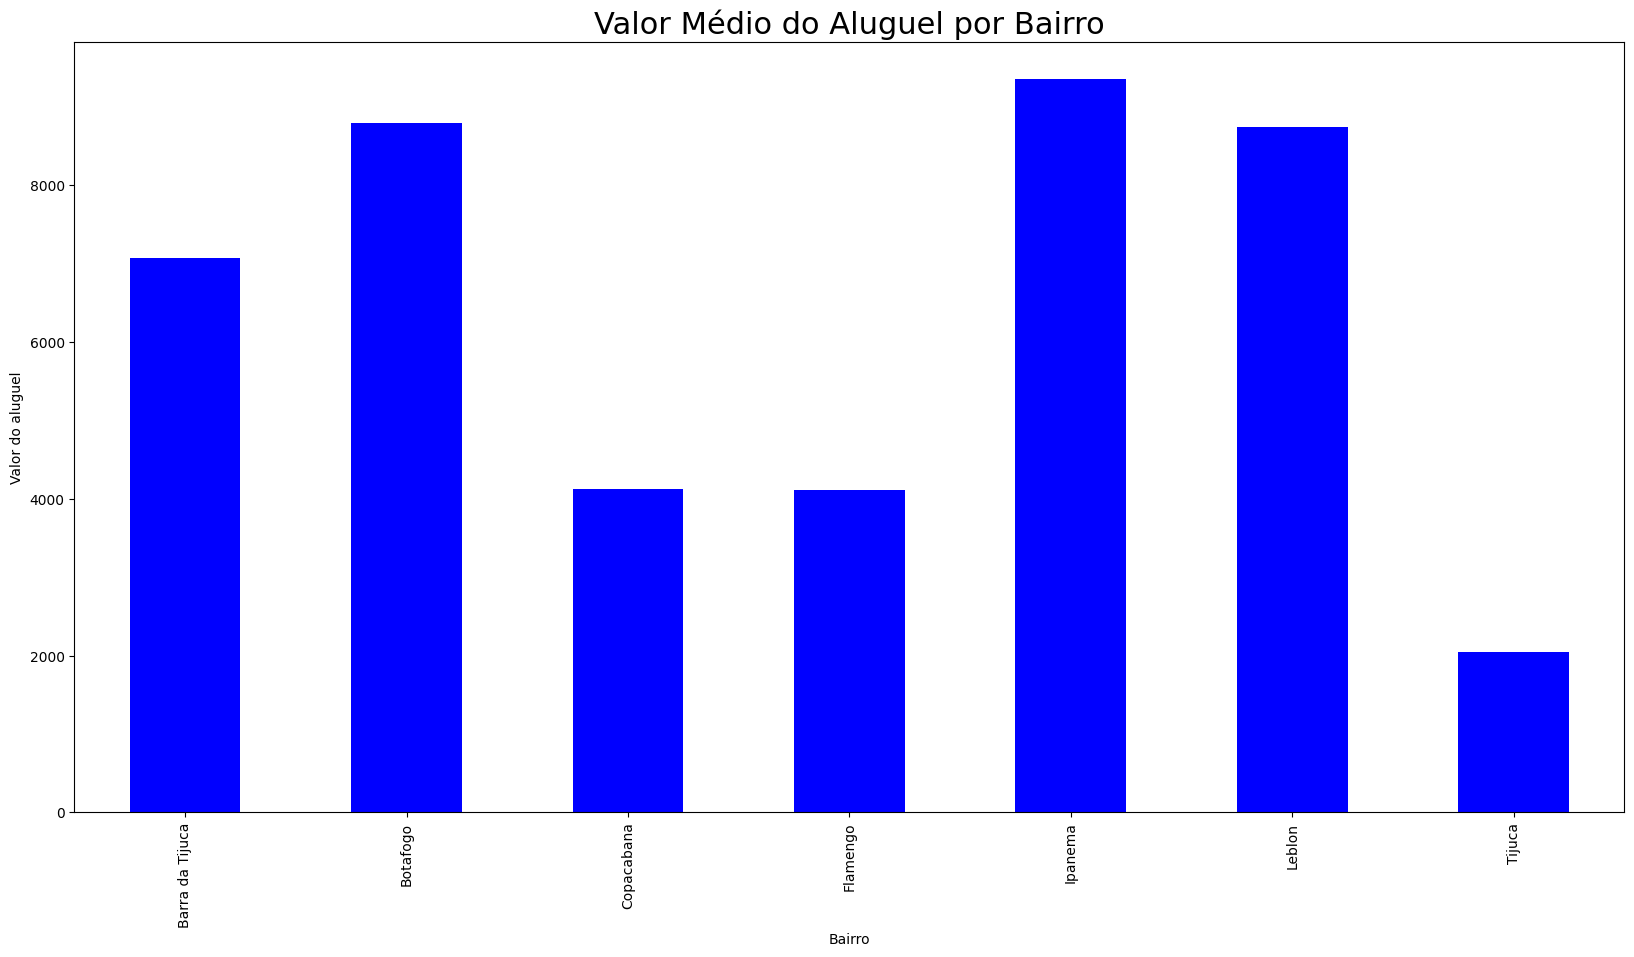

In [118]:
fig = grupo_bairro['Valor'].mean().plot.bar(color='blue')
fig.set_ylabel('Valor do aluguel')
fig.set_title('Valor Médio do Aluguel por Bairro', {'fontsize':22})

Text(0.5, 1.0, 'Valor Médio do Aluguel por Bairro')

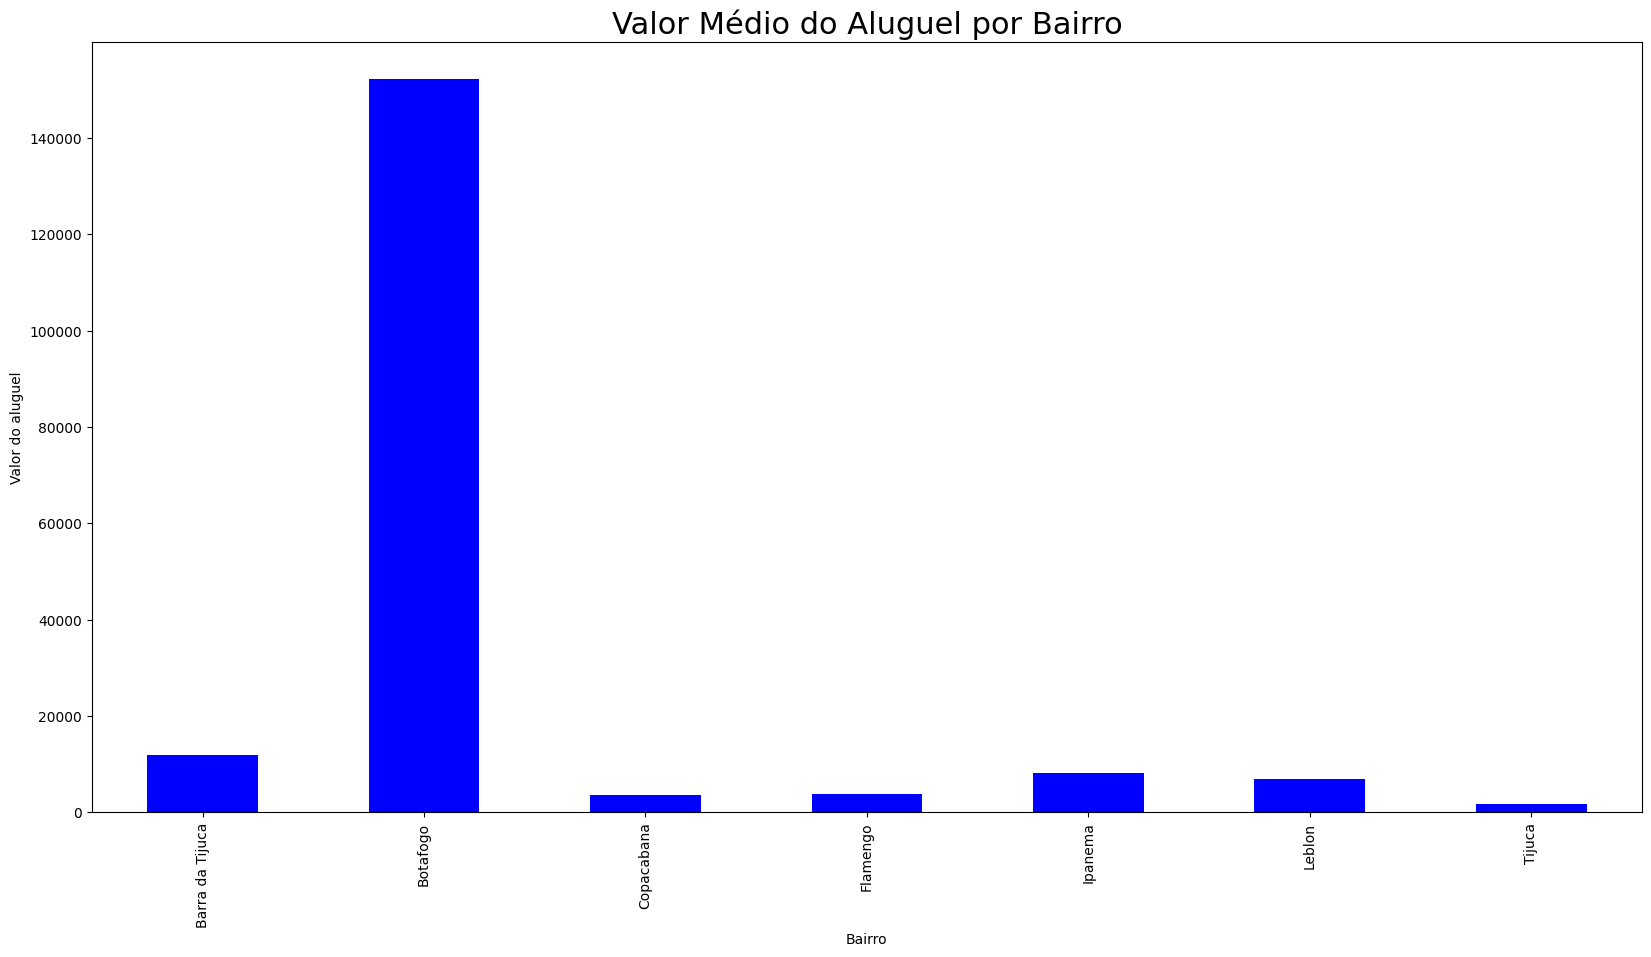

In [117]:
fig = grupo_bairro['Valor'].std().plot.bar(color='blue')
fig.set_ylabel('Valor do aluguel')
fig.set_title('Valor Médio do Aluguel por Bairro', {'fontsize':22})

Text(0.5, 1.0, 'Quantidado Média de Quartos por Bairro')

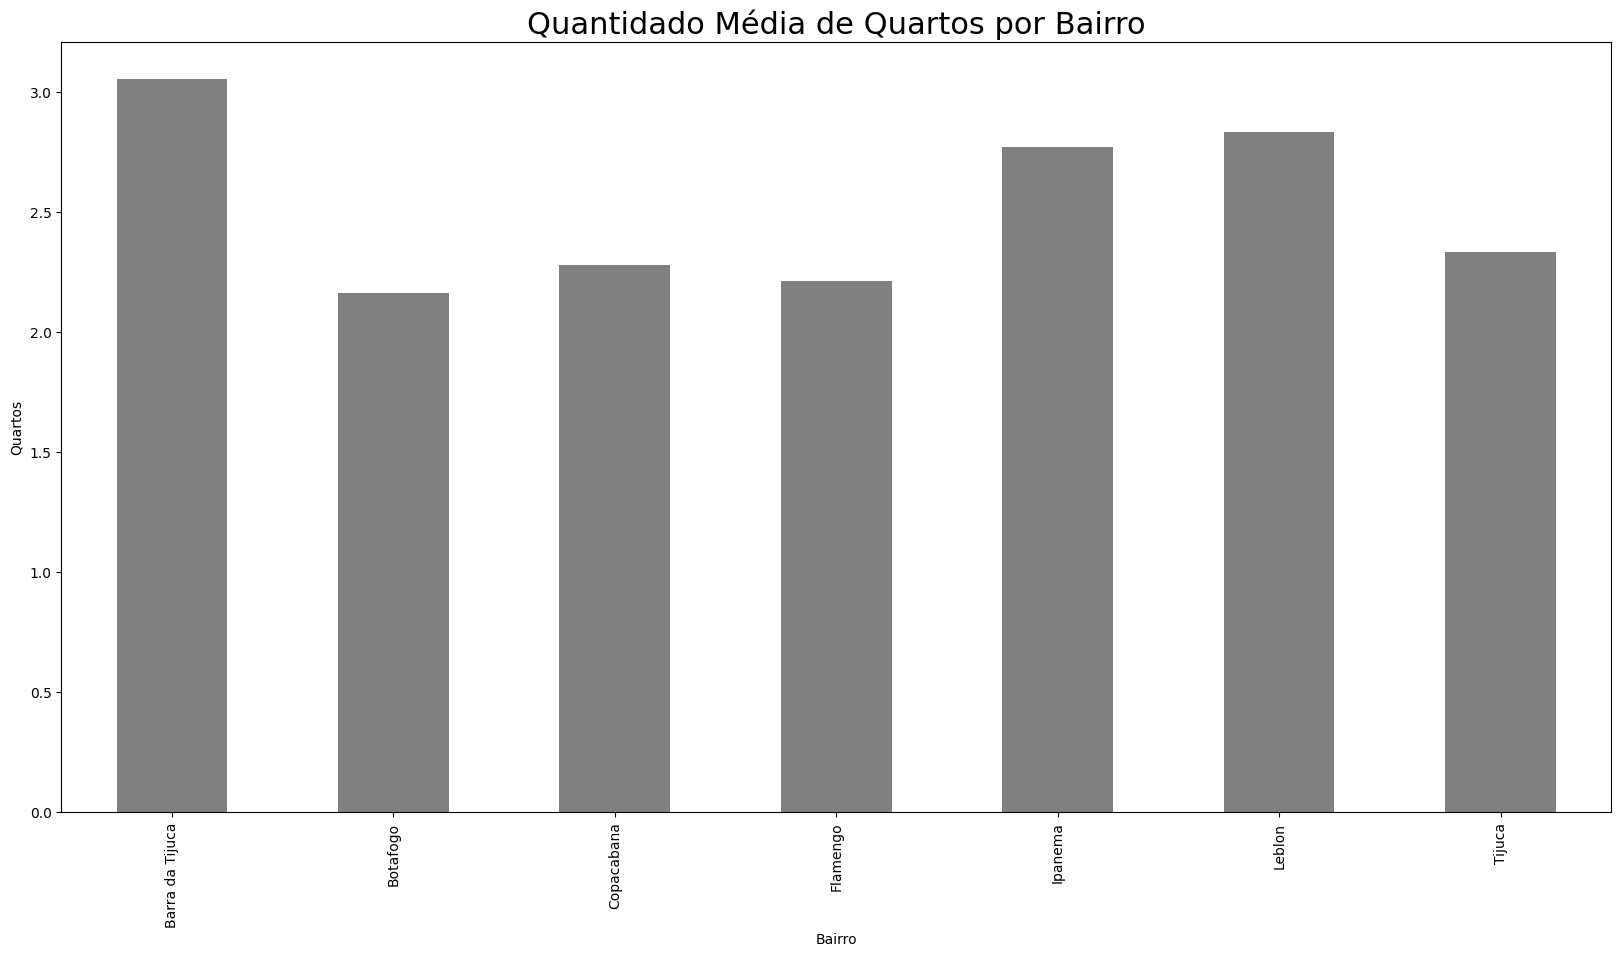

In [126]:
fig = grupo_bairro['Quartos'].mean().plot.bar(color='grey')
fig.set_ylabel('Quartos')
fig.set_title('Quantidado Média de Quartos por Bairro', {'fontsize':22})

## Sumarizando Informações

In [111]:
import pandas as pd
alunos = pd.DataFrame({'Nome': ['Ary', 'Cátia', 'Denis', 'Beto', 'Bruna', 'Dara', 'Carlos', 'Alice'], 
                        'Sexo': ['M', 'F', 'M', 'M', 'F', 'F', 'M', 'F'], 
                        'Idade': [15, 27, 56, 32, 42, 21, 19, 35], 
                        'Notas': [7.5, 2.5, 5.0, 10, 8.2, 7, 6, 5.6], 
                        'Aprovado': [True, False, False, True, True, True, False, False]}, 
                        columns = ['Nome', 'Idade', 'Sexo', 'Notas', 'Aprovado'])

In [112]:
alunos

,Nome,Idade,Sexo,Notas,Aprovado
0,Ary,15,M,7.5,True
1,Cátia,27,F,2.5,False
2,Denis,56,M,5.0,False
3,Beto,32,M,10.0,True
4,Bruna,42,F,8.2,True
5,Dara,21,F,7.0,True
6,Carlos,19,M,6.0,False
7,Alice,35,F,5.6,False


In [113]:
sexo = alunos.groupby('Sexo')
sexo = pd.DataFrame(sexo['Notas'].mean().round(2))
sexo.columns = ['Notas Médias']

In [114]:
sexo

,Notas Médias
Sexo,
F,5.82
M,7.12


##### Selecionando as Estatísticas Descritivas

In [128]:
precos = pd.DataFrame([['Feira', 'Cebola', 2.5], 
                        ['Mercado', 'Cebola', 1.99], 
                        ['Supermercado', 'Cebola', 1.69], 
                        ['Feira', 'Tomate', 4], 
                        ['Mercado', 'Tomate', 3.29], 
                        ['Supermercado', 'Tomate', 2.99], 
                        ['Feira', 'Batata', 4.2], 
                        ['Mercado', 'Batata', 3.99], 
                        ['Supermercado', 'Batata', 3.69]], 
                        columns = ['Local', 'Produto', 'Preço'])
precos

,Local,Produto,Preço
0,Feira,Cebola,2.50
1,Mercado,Cebola,1.99
2,Supermercado,Cebola,1.69
3,Feira,Tomate,4.00
4,Mercado,Tomate,3.29
5,Supermercado,Tomate,2.99
6,Feira,Batata,4.20
7,Mercado,Batata,3.99
8,Supermercado,Batata,3.69


In [129]:
produtos = precos.groupby('Produto', sort = False)
produtos.describe().round(2)

Preço                                         
        count  mean   std   min   25%   50%   75%  max
Produto                                               
Cebola    3.0  2.06  0.41  1.69  1.84  1.99  2.24  2.5
Tomate    3.0  3.43  0.52  2.99  3.14  3.29  3.64  4.0
Batata    3.0  3.96  0.26  3.69  3.84  3.99  4.10  4.2

In [131]:
estatisticas = ['mean', 'std', 'min', 'max']
nomes = {'mean':'Média','std':'Desvio Padrão', 'min':'Mínimo', 'max':'Máximo'}
produtos['Preço'].aggregate(estatisticas).rename(columns=nomes).round(2)

,Média,Desvio Padrão,Mínimo,Máximo
Produto,,,,
Cebola,2.06,0.41,1.69,2.5
Tomate,3.43,0.52,2.99,4.0
Batata,3.96,0.26,3.69,4.2


: 